# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2384 Поглазов Никита Васильевич и Вовченко София Евгеньевна. Вариант №14.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

Формула прямоугольников:

$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$

Формула трапеций:

$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$

Формула Симпсона:

$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

Формула для интегрирования по "правилу 3/8":

$y_{n+2} = y_{n-1} + \frac{1}{8} (s_{n+2} + 3 s_{n+1} + 3 s_n + s_{n-1})$

Отношение значений:

$\gamma = \frac{\text{Вычисленное}}{\text{Точное}}$

Связь передаточной функции для круговой частоты и циклической:

$H(w) = H(2 \pi f) = \tilde H(f)$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $ \tilde H(f) $. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [2]:
import numpy as np
import matplotlib.pyplot as plt

- Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

Пусть $s_n=e^{i\omega n}, y_n = H(\omega)e^{i \omega n}$

Точное значение интеграла от $e^{i\omega t}$ равно $\frac{e^{i\omega t}}{i\omega }$

**Формула прямоугольников**: $y_{n+1} = y_n + s_{n+1/2},\; y_0=0$

$$
\begin{aligned}
    H(\omega) & e^{i \omega (n + 1)} = H(\omega)e^{i \omega n} + e^{i\omega (n + 1/2)} \\ 
    H(\omega ) & e^{i\omega n} e^{i\omega } - H(\omega ) e^{i\omega n} = e^{i\omega n} e^{i\omega / 2} \\
    H(\omega ) & (e^{i\omega } - 1) = e^{i\omega / 2} \\
    H(\omega ) 
    &= \frac{e^{i\omega / 2}}{e^{i\omega } - 1} 
    = \frac{e^{i\omega / 2}}{(e^{i\omega } - 1)} \cdot \frac{e^{-i\omega / 2}}{e^{-i\omega / 2}} 
    = \frac{1}{e^{(i\omega / 2)} - e^{(-i\omega / 2 )}} \\
    &= \frac{1}{\cos(\omega / 2 ) + i \sin(\omega / 2 ) - \cos(-\omega / 2 ) - i \sin(-\omega / 2 )} \\
    &= \frac{1}{\cos(\omega / 2 ) + i \sin(\omega / 2 ) - \cos(\omega / 2 ) + i \sin(\omega / 2 )} 
    = \boxed{\frac{1}{2 i \sin(\omega / 2 )}} \\
\end{aligned}
$$

Отношение значений:

$$
\gamma = \frac{\text{Вычисленное}}{\text{Точное}} = \frac{i \omega }{2 i \sin(\omega / 2 )} = \frac{\omega / 2 }{\sin(\omega / 2)}
$$

**Формула трапеций**: $y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}),\; y_0=0$

$$
\begin{aligned}
    H(\omega) & e^{i\omega (n+1)} = H(\omega)e^{i\omega n} + \tfrac{1}{2}\big(e^{i\omega n} + e^{i\omega (n+1)}\big) \\
    H(\omega) & e^{i\omega n} e^{i\omega} - H(\omega)e^{i\omega n} = \tfrac{1}{2} e^{i\omega n}(1 + e^{i\omega}) \\
    H(\omega) & (e^{i\omega} - 1) = \tfrac{1}{2}(1 + e^{i\omega}) \\
    H(\omega) &= \frac{e^{i\omega} + 1}{2(e^{i\omega} - 1)}
    = \frac{(e^{i\omega} + 1)}{2(e^{i\omega} - 1)} \cdot \frac{e^{-i\omega / 2}}{e^{-i\omega / 2}} \\
    &= \frac{e^{i\omega/2} + e^{-i\omega/2}}{2(e^{i\omega/2} - e^{-i\omega/2})}
    = \frac{2\cos(\omega/2)}{4i\sin(\omega/2)}
    = \boxed{\frac{\cos(\omega/2)}{2i\sin(\omega/2)}} \\
\end{aligned}
$$

Отношение значений:
$$
\gamma = \frac{\text{Вычисленное}}{\text{Точное}}
= \frac{i\omega \cos(\omega/2)}{2i\sin(\omega/2)}
= \boxed{\frac{(\omega/2)\cos(\omega/2)}{\sin(\omega/2)}}
$$

**Формула Симпсона**:
$y_{n+1} = y_{n-1} + \tfrac{1}{3}(s_{n-1} + 4s_n + s_{n+1}), \quad y_0 = 0$

$$
\begin{aligned}
    H(\omega) & e^{i\omega (n+1)} = H(\omega)e^{i\omega (n-1)} + \tfrac{1}{3}\big(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)}\big) \\
    H(\omega) & e^{i\omega n} e^{i\omega} = H(\omega)e^{i\omega n} e^{-i\omega} + \tfrac{1}{3}\big(e^{i\omega n} e^{-i\omega} + 4e^{i\omega n} + e^{i\omega n} e^{i\omega}\big) \\
    H(\omega) & e^{i\omega n}(e^{i\omega} - e^{-i\omega}) = \tfrac{1}{3}e^{i\omega n}(e^{-i\omega} + 4 + e^{i\omega}) \\
    H(\omega) & (e^{i\omega} - e^{-i\omega}) = \tfrac{1}{3}(e^{-i\omega} + 4 + e^{i\omega}) \\
    H(\omega) &= \frac{4 + e^{i\omega} + e^{-i\omega}}{3(e^{i\omega} - e^{-i\omega})}
    = \frac{4 + 2\cos(\omega)}{3 \cdot 2i\sin(\omega)}
    = \boxed{\frac{2 + \cos(\omega)}{3i\sin(\omega)}} \\
\end{aligned}
$$

Отношение значений:
$$
\gamma = \frac{\text{Вычисленное}}{\text{Точное}}
= \frac{i\omega(2 + \cos(\omega))}{3i\sin(\omega)}
= \boxed{\frac{(2 + \cos(\omega)) \omega}{3\sin(\omega)}}
$$



In [3]:
f = np.linspace(0.0001, .5, 10000)
omega = 2 * np.pi * f

In [4]:
def H_rect(omega: np.ndarray) -> np.ndarray:
    return 1 / (2 * 1j * np.sin(omega / 2))


def H_trapezoid(omega: np.ndarray) -> np.ndarray:
    return np.cos(omega / 2) / (2 * 1j * np.sin(omega / 2))
    

def H_simpson(omega: np.ndarray) -> np.ndarray:
    return (2 + np.cos(omega)) / (3 * 1j * np.sin(omega))

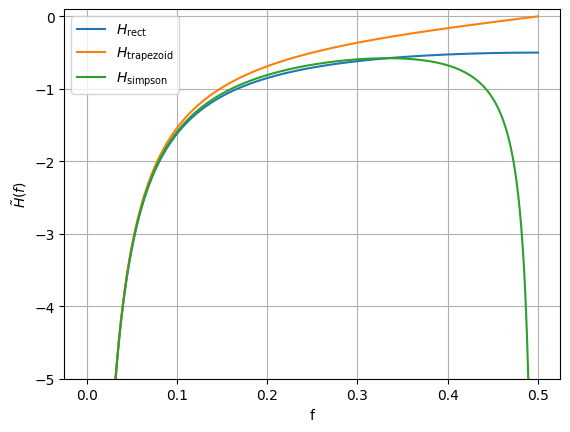

In [5]:
plt.plot(f, H_rect(omega).imag, label=r"$H_{\text{rect}}$")
plt.plot(f, H_trapezoid(omega).imag, label=r'$H_{\text{trapezoid}}$')
plt.plot(f, H_simpson(omega).imag, label=r'$H_{\text{simpson}}$')

plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.ylim((-5, .1))
plt.legend()
plt.grid()
plt.show()

In [6]:
def gamma_rect(omega: np.ndarray) -> np.ndarray:
    return (omega / 2) / np.sin(omega / 2)

def gamma_trapezoid(omega: np.ndarray) -> np.ndarray:
    return np.cos(omega / 2) * omega / 2 / np.sin(omega / 2)

def gamma_simpson(omega: np.ndarray) -> np.ndarray:
    return (2 + np.cos(omega)) * omega / (3 * np.sin(omega))

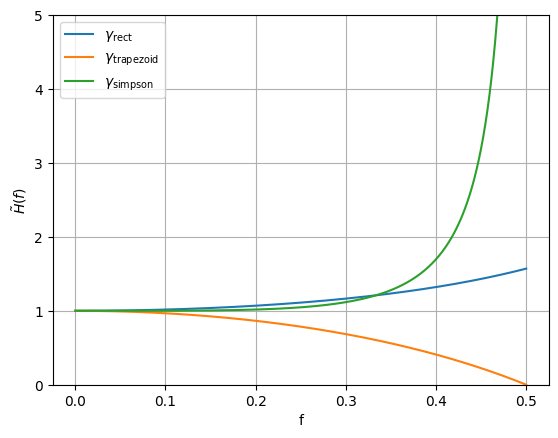

In [7]:
plt.plot(f, gamma_rect(omega), label=r'$\gamma_{\text{rect}}$')
plt.plot(f, gamma_trapezoid(omega), label=r'$\gamma_{\text{trapezoid}}$')
plt.plot(f, gamma_simpson(omega), label=r'$\gamma_{\text{simpson}}$')

plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.ylim((0, 5))
plt.legend()
plt.grid()
plt.show()

Все три метода показывают, что при $f\to0$ мнимая часть передаточной функции $\mathrm{Im}(\tilde H(f))$ стремится к $-\infty$. Такое поведение соответствует идеальному интегратору ($H(\omega) = \frac{1}{i\omega} = -\frac{i}{\omega}$), для которого характерно бесконечное усиление на нулевой частоте. Следовательно, данные методы действуют как фильтры нижних частот, усиливающие низкочастотные компоненты сигнала.
Из второго графика видно, что все три метода сходятся к значению $\gamma = 1$, что свидетельствует о высокой точности интегрирования для медленно изменяющихся сигналов.
Кроме того, по графикам заметно, что метод Симпсона обеспечивает наилучшую точность — его характеристика дольше остаётся близкой к $\gamma = 1$ (примерно до $f \approx 0.22$).
В области высоких частот все методы обеспечивают сильное подавление сигнала, при этом формула Симпсона демонстрирует наиболее выраженное ослабление высокочастотных составляющих.

- Вывести формулу передаточной функции рекурсивного фильтра для интегрирования по "правилу 3/8": $$ y_{n+2} = y_{n-1} + \frac18(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1}). $$ Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

Правило 3/8: $y_{n+2} = y_{n-1} + \frac18(s_{n+2} + 3s_{n+1} + 3s_n + s_{n-1})$

$$
\begin{aligned}
    H(\omega) & e^{i\omega (n+2)} = H(\omega)e^{i\omega (n-1)} + \tfrac{1}{8}\big(e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)}\big) \\
    H(\omega) & e^{i\omega n} e^{2i\omega} - H(\omega)e^{i\omega n} e^{-i\omega} 
    = \tfrac{1}{8}\big(e^{i\omega n} e^{2i\omega} + 3e^{i\omega n} e^{i\omega} + 3e^{i\omega n} + e^{i\omega n} e^{-i\omega}\big) \\
    H(\omega) & e^{i\omega n}(e^{2i\omega} - e^{-i\omega}) = \tfrac{1}{8} e^{i\omega n}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}) \\
    H(\omega) & (e^{2i\omega} - e^{-i\omega}) = \tfrac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}) \\
    H(\omega) 
    &= \frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})} \cdot \frac{e^{-i\omega / 2}}{e^{-i\omega / 2}} 
    = \frac{e^{3 i\omega / 2} + 3e^{i\omega / 2} + 3e^{-i\omega / 2} + e^{-3 i\omega / 2}}{8(e^{3 i\omega / 2} - e^{-3i\omega / 2})} \\
    &= \boxed{\frac{\cos(3\omega / 2) + 3\cos(\omega / 2)}{8i\sin(3\omega / 2)}} \\
\end{aligned}
$$

Отношение значений:
$$
\gamma = \frac{\text{Вычисленное}}{\text{Точное}}
= \frac{i\omega\big(\cos(3\omega / 2) + \cos(\omega / 2)\big)}{8i\sin(3 \omega / 2)}
= \boxed{\frac{\omega\big(\cos(3 \omega / 2) + \cos(\omega / 2)\big)}{8\sin(3 \omega / 2)}}
$$

In [8]:
def H_38(omega: np.ndarray) -> np.ndarray:
    return (np.cos(omega * 3 / 2) + np.cos(omega / 2)) / (8 * 1j * np.sin(3 * omega / 2))

def gamma_38(omega: np.ndarray) -> np.ndarray:
    return omega * (np.cos(omega * 3 / 2) + np.cos(omega / 2)) / (8 * np.sin(3 * omega / 2))

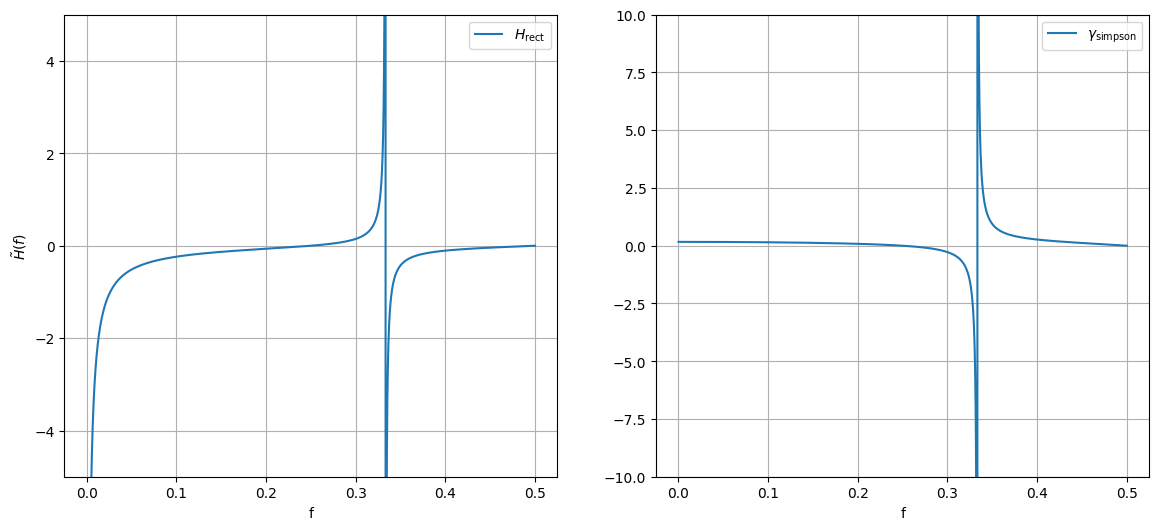

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.plot(f, H_38(omega).imag, label=r"$H_{\text{rect}}$")

plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.ylim((-5, 5))
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(f, gamma_38(omega), label=r'$\gamma_{\text{simpson}}$')

plt.xlabel('f')
plt.ylim((-10, 10))
plt.legend()
plt.grid()

plt.show()

- Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

В диапазоне низких частот амплитуды передаточных функций всех рассмотренных методов практически совпадают с идеальными значениями, что указывает на их корректную работу в области медленно меняющихся сигналов.

Формулы прямоугольника, трапеции и Симпсона сходятся к единичному значению при $f\to0$, что указывает на их высокую точность при интегрировании медленно изменяющихся сигналов. Формула Симпсона отличается наилучшей точностью — его характеристика (график $\gamma(f)$) остаётся близкой к $\gamma=1$ до $f\approx0.22$.

Методы прямоугольников, трапеций и Симпсона устойчивы и полностью подавляют сигнал на частоте $f=0.5$(частота Найквиста), эффективно устраняя высокочастотные шумы. В то же время метод 3/8 неустойчив: при определённой частоте у него возникает резонанс, что приводит к бесконечному усилению и сильным искажениям сигнала.


## Выводы

В результате выполнения лабораторной работы были получены выражения для передаточных функций $H(\omega)$ и функций точности $\gamma$ четырёх рекурсивных фильтров, соответствующих формулам: прямоугольников, трапеций, Симпсона и правила 3/8.
На основе этих выражений построены графики частотных характеристик $\tilde H(f)$ и функций точности $\gamma$, а также выполнен сравнительный анализ полученных частотных зависимостей для всех рассмотренных методов.
Так же был проведен сопоставительный анализ частотных характеристик всех передаточных функций, полученных при выполнении п. 1 и 2.